In [79]:
import torch
from api.model import GeoModel
from transformers import DistilBertTokenizerFast
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine_vector, Unit
import numpy as np
import geopandas as gpd
import matplotlib
import numpy

In [3]:
BASE_MODEL = 'models/2021-12-03_model-distilbert-base-uncased_loss-wiki_exploded_geonames'
TOKEN_MODEL = 'distilbert-base-uncased'

In [6]:
geobert = GeoModel(
    model_string=BASE_MODEL,
    tokenizer_string=TOKEN_MODEL,
    tokenizer_class=DistilBertTokenizerFast,
    max_seq_length=200)

In [ ]:
df = pd.read_csv("data/wiki_exploded.gz")

In [57]:
df_test = df.drop_duplicates("text").dropna().sample(1000)

In [58]:
geobert.forward(df_test.text.to_list())

In [59]:
df_pred = pd.DataFrame(geobert.predict_point(), columns=["lat", "lon"])

In [60]:
df_test['error'] = haversine_vector(df_pred, df_test[['lat', 'lon']])

In [67]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:xlabel='lon', ylabel='lat'>

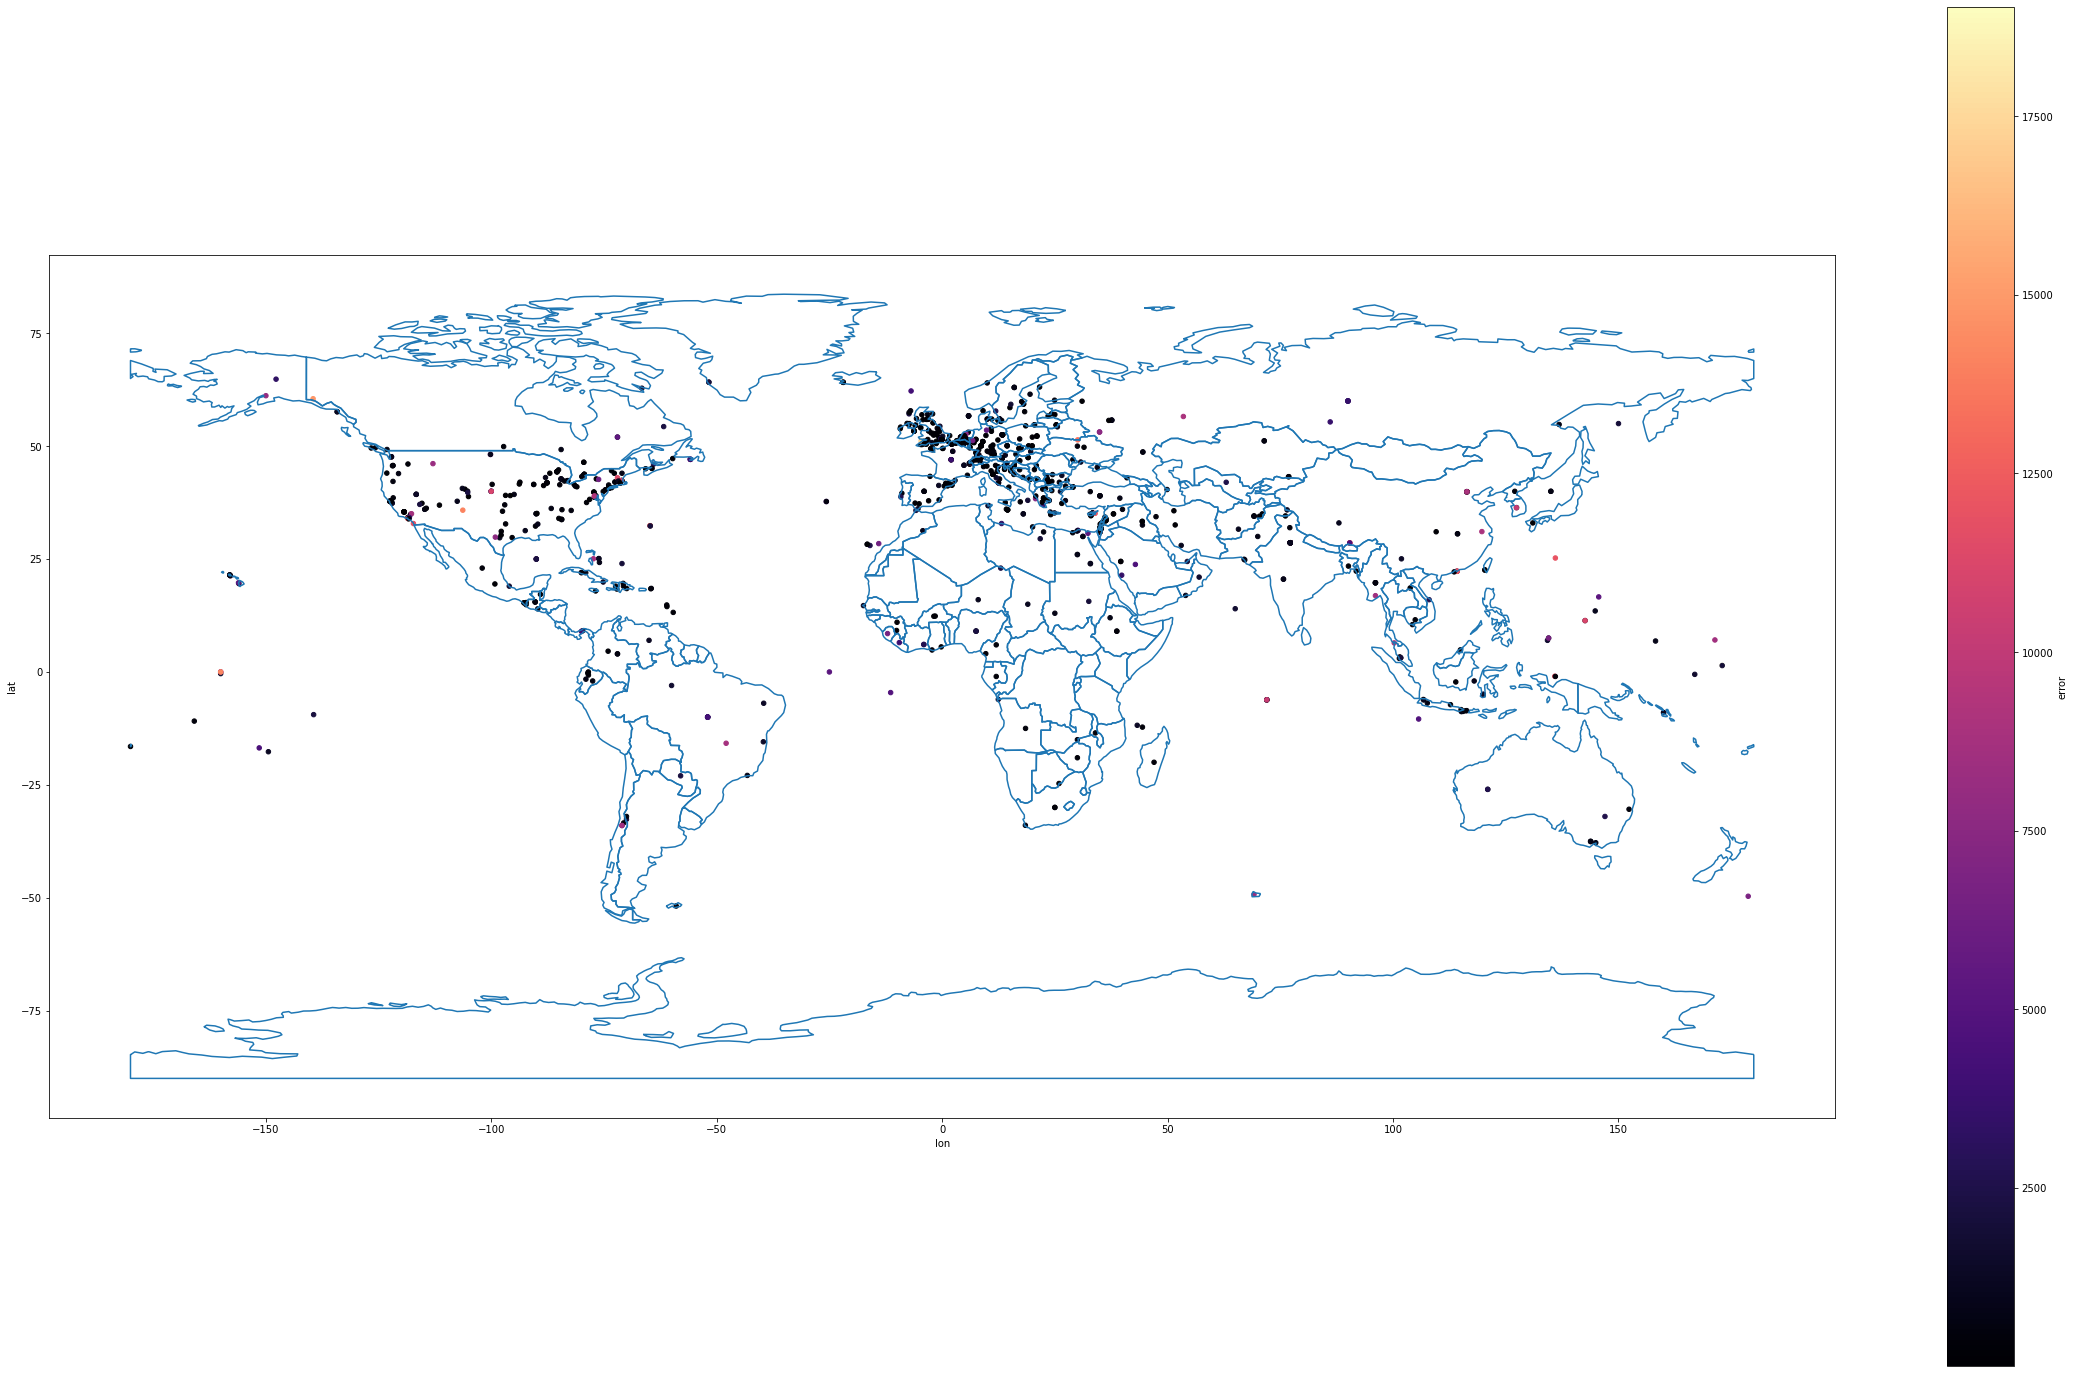

In [75]:
ax = world.boundary.plot()
df_test.plot.scatter(x='lon', y='lat', c='error', cmap='magma', figsize=(40,25), ax=ax)
